# Atividade 3

## Questão 1

Considere a base de dados disponível em https://www.openml.org/d/1460 (dica: no sklearn, você pode usar o fetch_openml para baixar a base). Usando o StratifiedKFold (fixe a semente em 42) com 10 folds, dentre os algoritmos de classificação Discriminante Linear, Discriminante Quadrático, Naive Bayes e Regressão Logística, o algoritmo com maior taxa de acurácia média no conjunto de teste é o **Discriminante Quadrático** e o algoritmo com maior AUC no conjunto de teste é o **Naive Bayes**.

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
dataset = fetch_openml('banana')
X = dataset.data
y = dataset.target

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

Accuracy for "LinearDiscriminantAnalysis": 55.99999999999999%
ROC Score for "LinearDiscriminantAnalysis": 54.82758428621444%

Accuracy for "QuadraticDiscriminantAnalysis": 62.188679245283005%
ROC Score for "QuadraticDiscriminantAnalysis": 64.89565985845755%

Accuracy for "GaussianNB": 61.33962264150943%
ROC Score for "GaussianNB": 66.47562897224917%

Accuracy for "LogisticRegression": 56.0188679245283%
ROC Score for "LogisticRegression": 54.82758428621444%



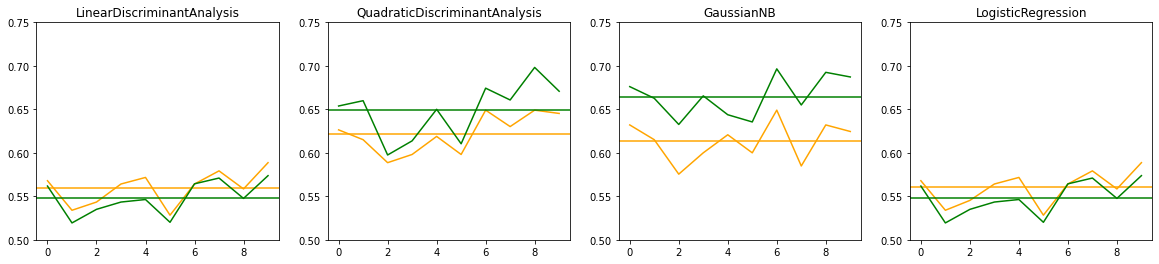

In [ ]:
skf = StratifiedKFold(n_splits = 10, random_state=42, shuffle=True)
models = {
    'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis(),
    'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis(),
    'GaussianNB': GaussianNB(),
    'LogisticRegression': LogisticRegression()
}
figure, axis = plt.subplots(1, len(models), figsize=(20,4))
x = [x for x in range(10)]

for i, (name, model) in enumerate(models.items()):
    accuracyScores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    print(f'Accuracy for \"{name}\": {accuracyScores.mean() * 100}%')
    ROCScores = cross_val_score(model, X, y, cv=skf, scoring='roc_auc')
    print(f'ROC Score for \"{name}\": {ROCScores.mean() * 100}%\n')
    axis[i].plot(x, accuracyScores, color='orange')
    axis[i].axhline(y=accuracyScores.mean(), color='orange')
    axis[i].plot(x, ROCScores, color='green')
    axis[i].axhline(y=ROCScores.mean(), color='green')
    
    axis[i].set_ylim([0.5, 0.75])
    axis[i].set_title(name)

## Questão 2

Considere a base de dados disponível em neste link. Essa base de dados contém informações sobre o aluguel de bicicletas pela plataforma citybike. A coluna cnt é a quantidade de bicicletas alugadas por hora, o qual queremos predizer com base nos outros atributos. Crie um modelo de regressão linear usando o modelo LinearRegression da biblioteca sklearn. A seguir, normalize os coeficientes da regressão pelo desvio padrão de cada atributo. Após essa normalização, o atributo que tem o maior coeficiente é o **hum**, e o atributo com o menor coeficiente é o **atemp**.

In [ ]:
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/amueller/ml-workshop-2-of-4/master/notebooks/data/bike_day_raw.csv')

In [ ]:
X = dataset.drop('cnt', axis=1)
y = dataset['cnt']

In [ ]:
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression()
linearRegression.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

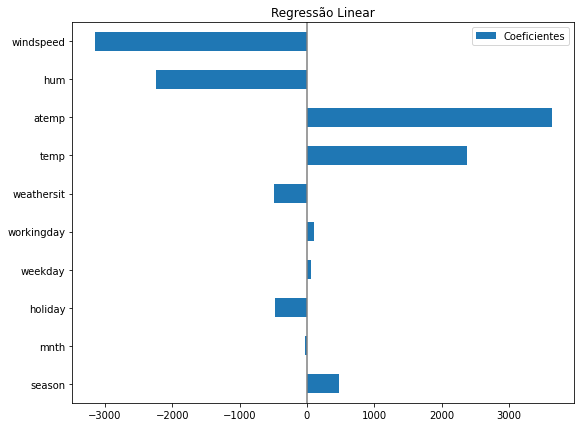

In [ ]:
feat_stats = pd.DataFrame(linearRegression.coef_, index = X.columns, columns = ['Coeficientes'])
feat_stats.plot(kind='barh', figsize=(9, 7))
plt.title('Regressão Linear')
plt.axvline(x=0, color='.5')

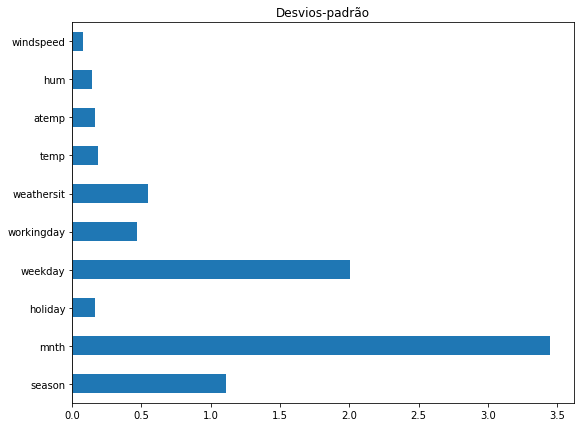

In [ ]:
feat_stats['std'] = X.std(axis=0)
feat_stats['std'].plot(kind='barh', figsize=(9, 7))
plt.title('Desvios-padrão')
plt.axvline(x=0, color='.5')

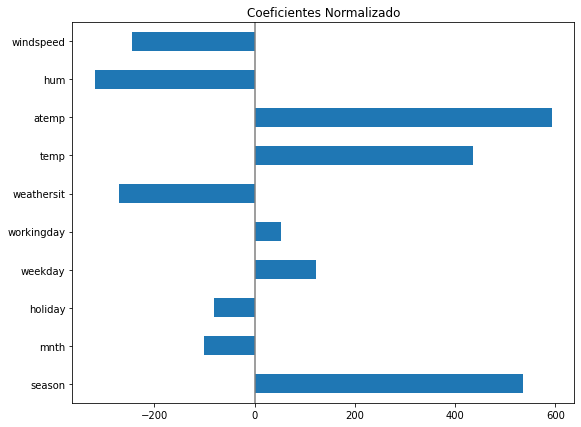

In [ ]:
feat_stats['Coeficientes Normalizados'] = feat_stats['Coeficientes']*feat_stats['std']
feat_stats['Coeficientes Normalizados'].plot(kind='barh', figsize=(9, 7))
plt.title('Coeficientes Normalizado')
plt.axvline(x=0, color='.5')

## Questão 3

Considere a base de dados disponível em https://www.openml.org/d/44 (dica, você pode usar o
fetch_openml para carregar os dados). Usando o classificador k-Vizinhos mais próximos e a função de
scoring roc_auc_scorer, construa a validation_curve variando os vizinhos de 1 a 15. O valor de k que produz o maior valor de roc_auc_scorer médio de teste é **6**.

In [ ]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml('spambase')
X = dataset.data
y = dataset.target

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import validation_curve

knn = KNeighborsClassifier()
knn.fit(X, y)

n_neighbors = range(1, 16)

roc = make_scorer(roc_auc_score, greater_is_better=False)
train_scores, test_scores = validation_curve(knn, X, y,'n_neighbors',param_range=n_neighbors,scoring='roc_auc')

In [ ]:
test_scores_means = [test_scores[i, :].mean() for i in range(15)]

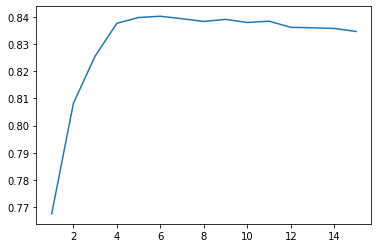

In [ ]:
plt.plot(n_neighbors, test_scores_means)

In [ ]:
np.array(test_scores_means).argmax()+1

6

## Questão 4

Considere a base de dados disponível em neste link. Essa base de dados contém informações sobre o aluguel de bicicletas pela plataforma citybike. A coluna cnt é a quantidade de bicicletas alugadas por hora, o qual queremos predizer com base nos outros atributos. Crie um pipeline usando PolynomialFeatures e a regressão Ridge. Considere o seguinte grid de parâmetros:
```
alphas = np.logspace(-3, 3, 7)

degree = list(range(1, 5))

param_grid = dict(regression__alpha=alphas, polynomial_features__degree=degree)
```
e a função de scoring baseada no mean_squared_error (como visto no notebook da aula). Usando o GridSearchCV com 5 folds, os melhores parâmetros encontrados foram de regression__alpha **REPOSTA** e polynomial_features__degree **RESPOSTA**.

In [ ]:
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/amueller/ml-workshop-2-of-4/master/notebooks/data/bike_day_raw.csv')
X = dataset[[n for n in dataset.columns if n != 'cnt']]
y = dataset['cnt']

In [ ]:
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ridge_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [ ]:
alphas = np.logspace(-3, 3, 7)
degrees = list(range(1, 5))

# #fig, axs = plt.subplots(1,len(degrees),figsize=(20,4))
# for i, degree in enumerate(degrees):

#     # transformação polinomial dos atributos
#     polynomial_features = PolynomialFeatures(degree=degree)
#     linear_regression = LinearRegression()

#     # combina a regressão linear com os atributos polinomiais
#     pipeline = Pipeline([("polynomial_features", polynomial_features),
#                          ("linear_regression", linear_regression)])
    
#     # treina o modelo
#     pipeline.fit(X[:, i], y)

#     # calcula a predição em todos os valores de x
#     yhat = pipeline.predict(X[:, i])

#     axs[i].plot(X,yhat,color='r')
#     axs[i].plot(X,y,color='b')
#     axs[i].scatter(X, y)
#     axs[i].set_title('Degree = '+str(degree))

mse = make_scorer(mean_squared_error, greater_is_better=False)
pipeline = Pipeline([("polynomial_features", PolynomialFeatures()),
                     ("regression", Ridge())])

alphas = np.logspace(-3, 3, 7)
degree = list(range(1, 5)) 
param_grid = dict(regression__alpha=alphas, polynomial_features__degree=degree)

grid = GridSearchCV(pipeline, param_grid=param_grid, scoring=mse, verbose=3, n_jobs=3, cv=5)
grid.fit(X, y)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  28 tasks      | elapsed:    1.9s
[Parallel(n_jobs=3)]: Done 140 out of 140 | elapsed:    3.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('polynomial_features',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('regression',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                                              random_state=None, solver='auto',
                                              tol=0.001))],
                                verbose=False),
             iid='deprecated', n_jobs=3,
             param_grid={'polynomial_features__degree': [

In [ ]:
grid.best_params_

{'polynomial_features__degree': 2, 'regression__alpha': 0.01}